In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\relyd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df1 = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df1.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df1.rename(columns = {"v1" : "label", "v2":"text"},inplace = True)
df1.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df1.replace("", float("NaN"), inplace=True)
df1.dropna(inplace=True)
df1

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df1["label"] = df1["label"].map({"ham": 0, "spam": 1})
df1.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df1,stratify=df1['label'], test_size=0.2, random_state=25)
training_data['label'].value_counts() 

0    3859
1     598
Name: label, dtype: int64

In [11]:
y = training_data['label']
X = training_data['text']

y_test = testing_data['label']
X_test = testing_data['text']

In [12]:
from sklearn.feature_selection import chi2
y = training_data['label']
X = training_data['text']


tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(X_test)

In [13]:
chi_scores = chi2(tfidf_train,y)

In [14]:
chi_scores

(array([13.49417126, 31.54475922,  0.03755063, ...,  1.93057612,
         0.2446909 ,  0.07041854]),
 array([2.39305635e-04, 1.94895666e-08, 8.46348259e-01, ...,
        1.64695428e-01, 6.20838440e-01, 7.90728365e-01]))

In [15]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(X) 
tfidf_test=tfidf_vectorizer.transform(X_test) 

In [16]:
mnb = MultinomialNB() 
mnb.fit(tfidf_train, y)
pred = mnb.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')

confusion_matrix(y_test,pred, labels=['0','1'])

Accuracy: 97.94%


array([[0, 0],
       [0, 0]], dtype=int64)

In [17]:
from sklearn import svm
from sklearn.svm import SVC

clf = SVC()
clf.fit(tfidf_train, y)

SVC()

In [18]:
from sklearn import metrics

y_pred = clf.predict(tfidf_train)
print("Training Accuracy:", metrics.accuracy_score(y, y_pred))

Training Accuracy: 0.9982050706753421


In [19]:
y_pred = clf.predict(tfidf_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Test Accuracy: 0.9874439461883409


In [20]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(tfidf_train, y) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   0.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   0.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.865 total time=   0.6s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.866 total time=   0.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.866 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.865 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [22]:
# best parameter after tuning
print(grid.best_params_)
 
# model after tuning
print(grid.best_estimator_)

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100, gamma=0.01)


In [25]:
clf = SVC(C=100, gamma=0.01, kernel='rbf')
clf.fit(tfidf_train, y) 

SVC(C=100, gamma=0.01)

In [26]:
y_pred = clf.predict(tfidf_train)
print("Training Accuracy:", metrics.accuracy_score(y, y_pred))

Training Accuracy: 0.9995512676688355


In [27]:
y_pred = clf.predict(tfidf_test)
print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Test Accuracy: 0.9874439461883409


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns

In [29]:
y_prediction = clf.predict(tfidf_test).flatten()
y_prediction 

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

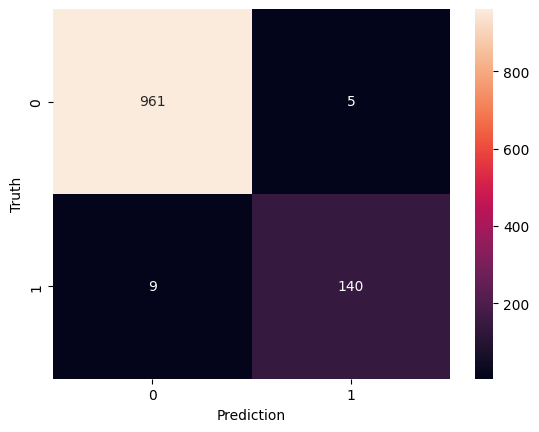

In [30]:
cm = confusion_matrix(y_test, y_prediction)
cm

sns.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [31]:
print(classification_report(y_test, y_prediction)) 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.94      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

